In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

LOADING DATASET

In [2]:
data = pd.read_csv("/content/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


<ipython-input-5-6cbf0978fdb9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x="fetal_health",palette=colours)


<Axes: xlabel='fetal_health', ylabel='count'>

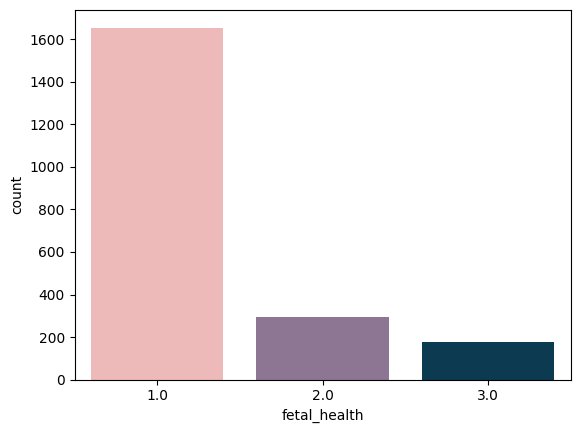

In [5]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

<Axes: >

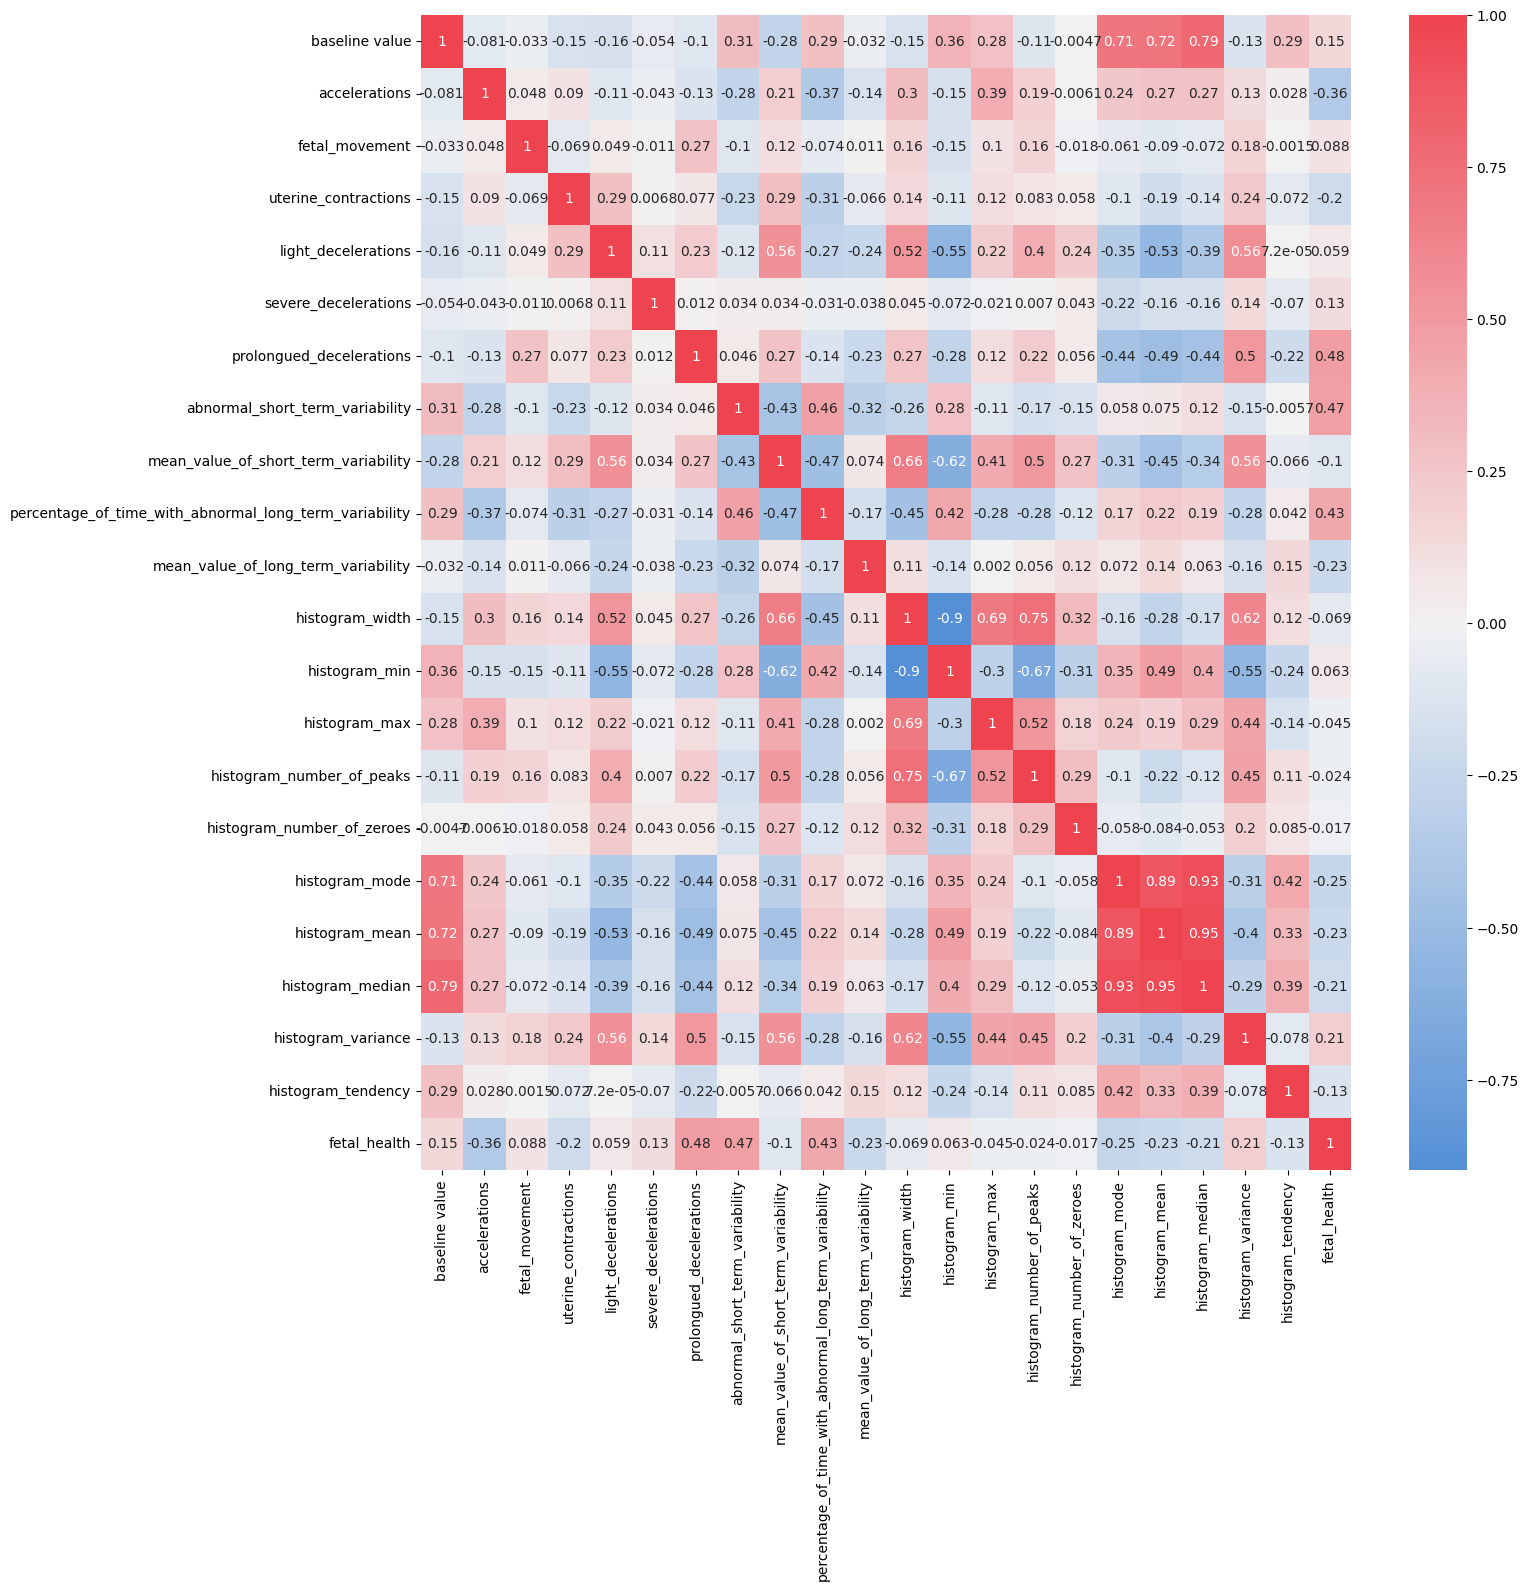

In [6]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


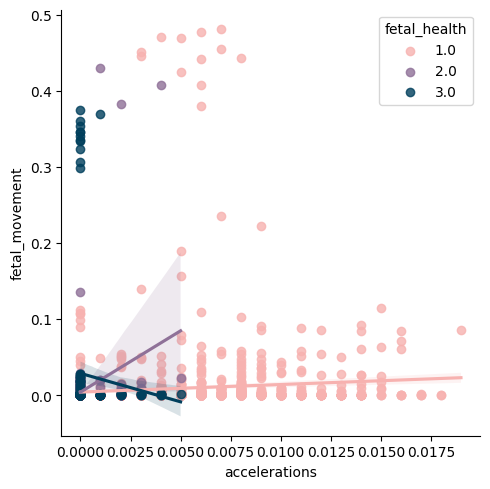

In [7]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


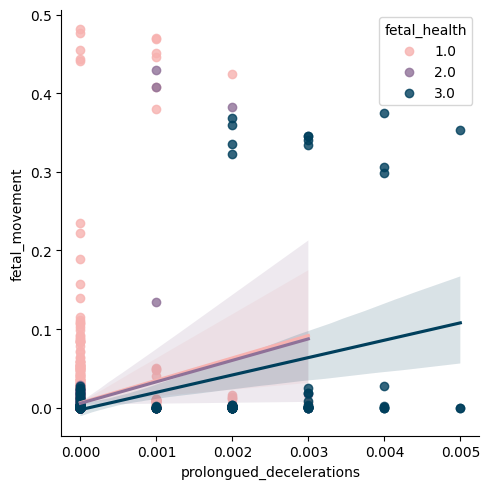

In [8]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


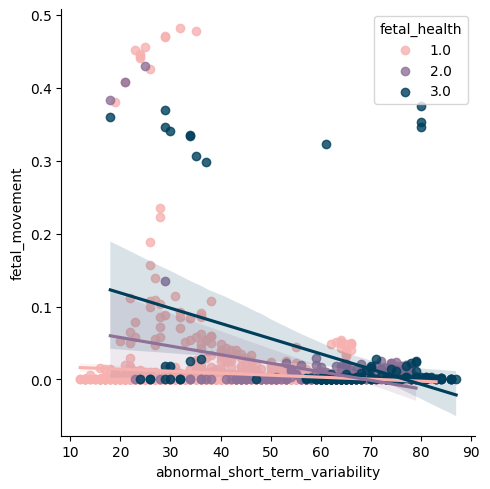

In [9]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


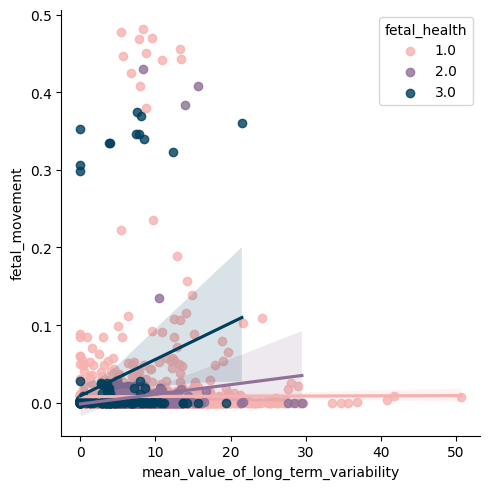

In [10]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In [11]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


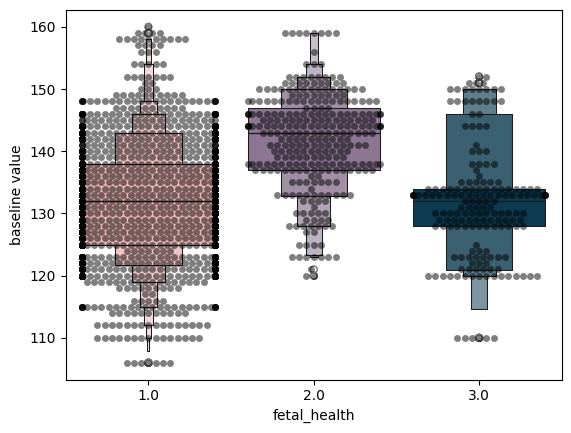

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

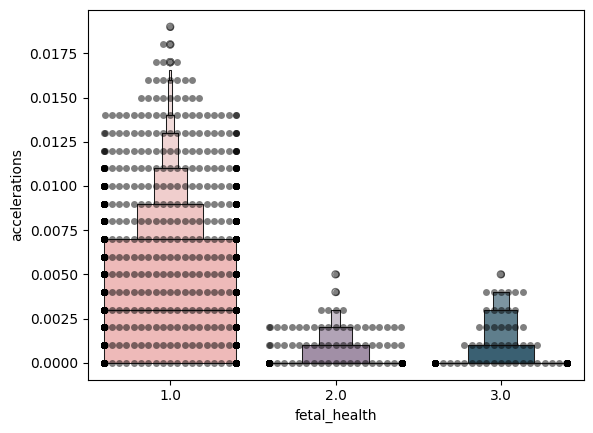

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

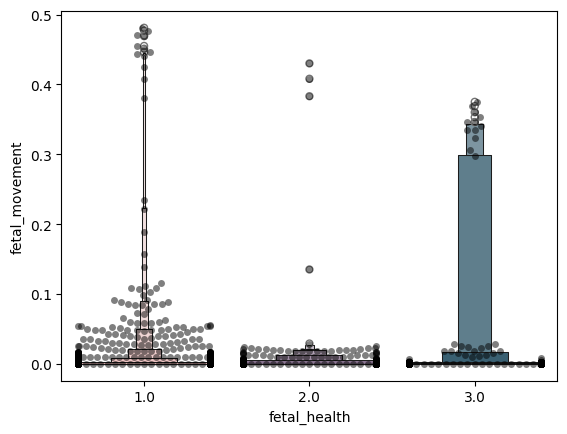

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

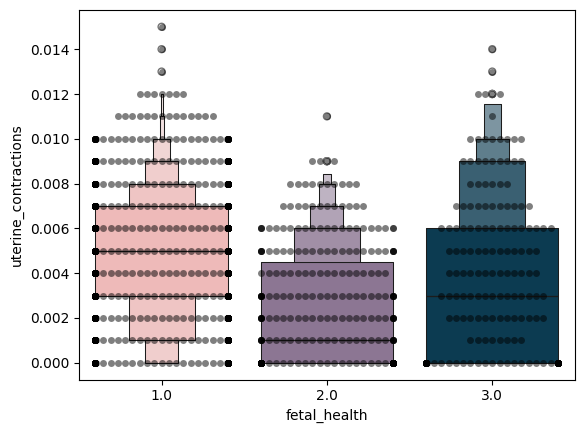

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

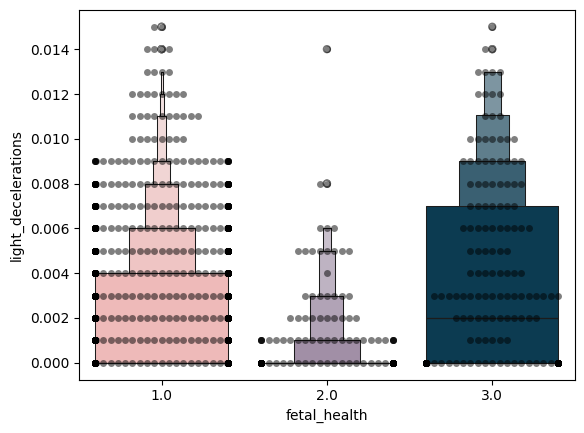

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

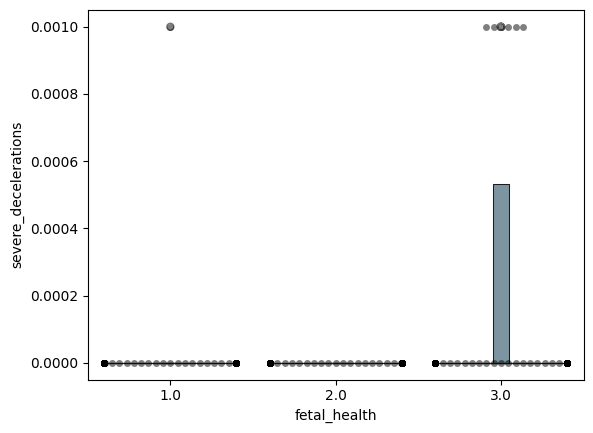

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 96.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

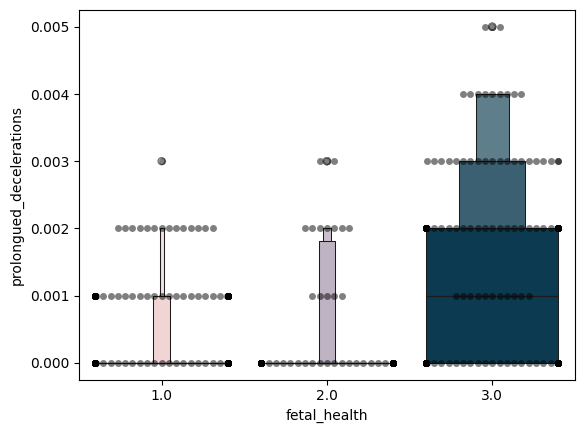

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

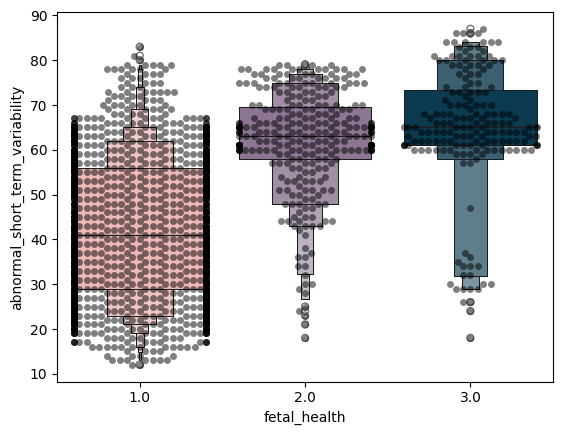

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

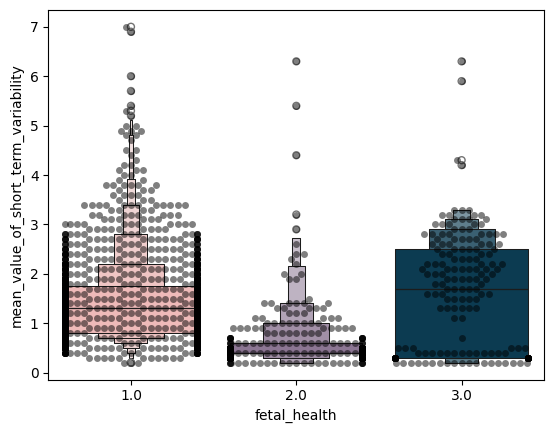

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

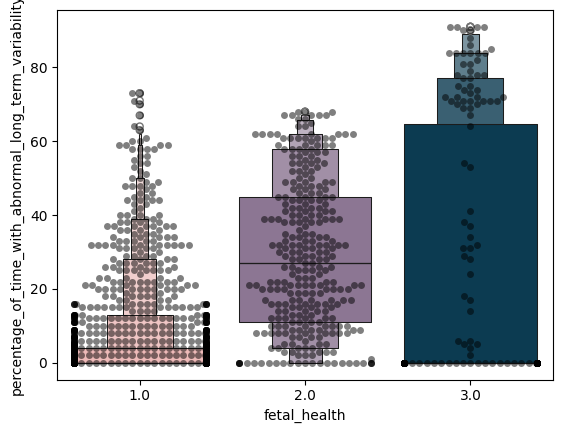

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-12-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

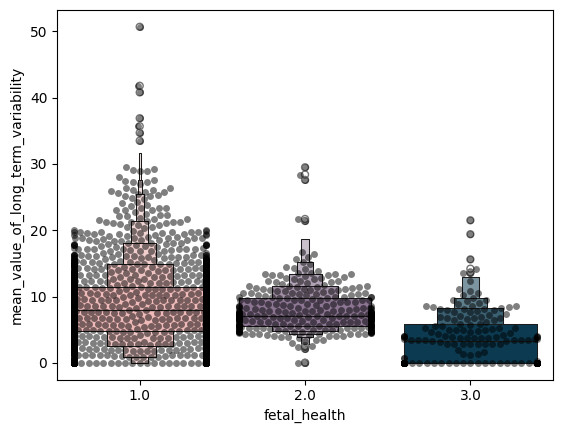

In [12]:
for i in cols:
    sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
    plt.show()

<ipython-input-13-05883365f886>:3: UserWarning: 
The palette list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = data,palette = shades)


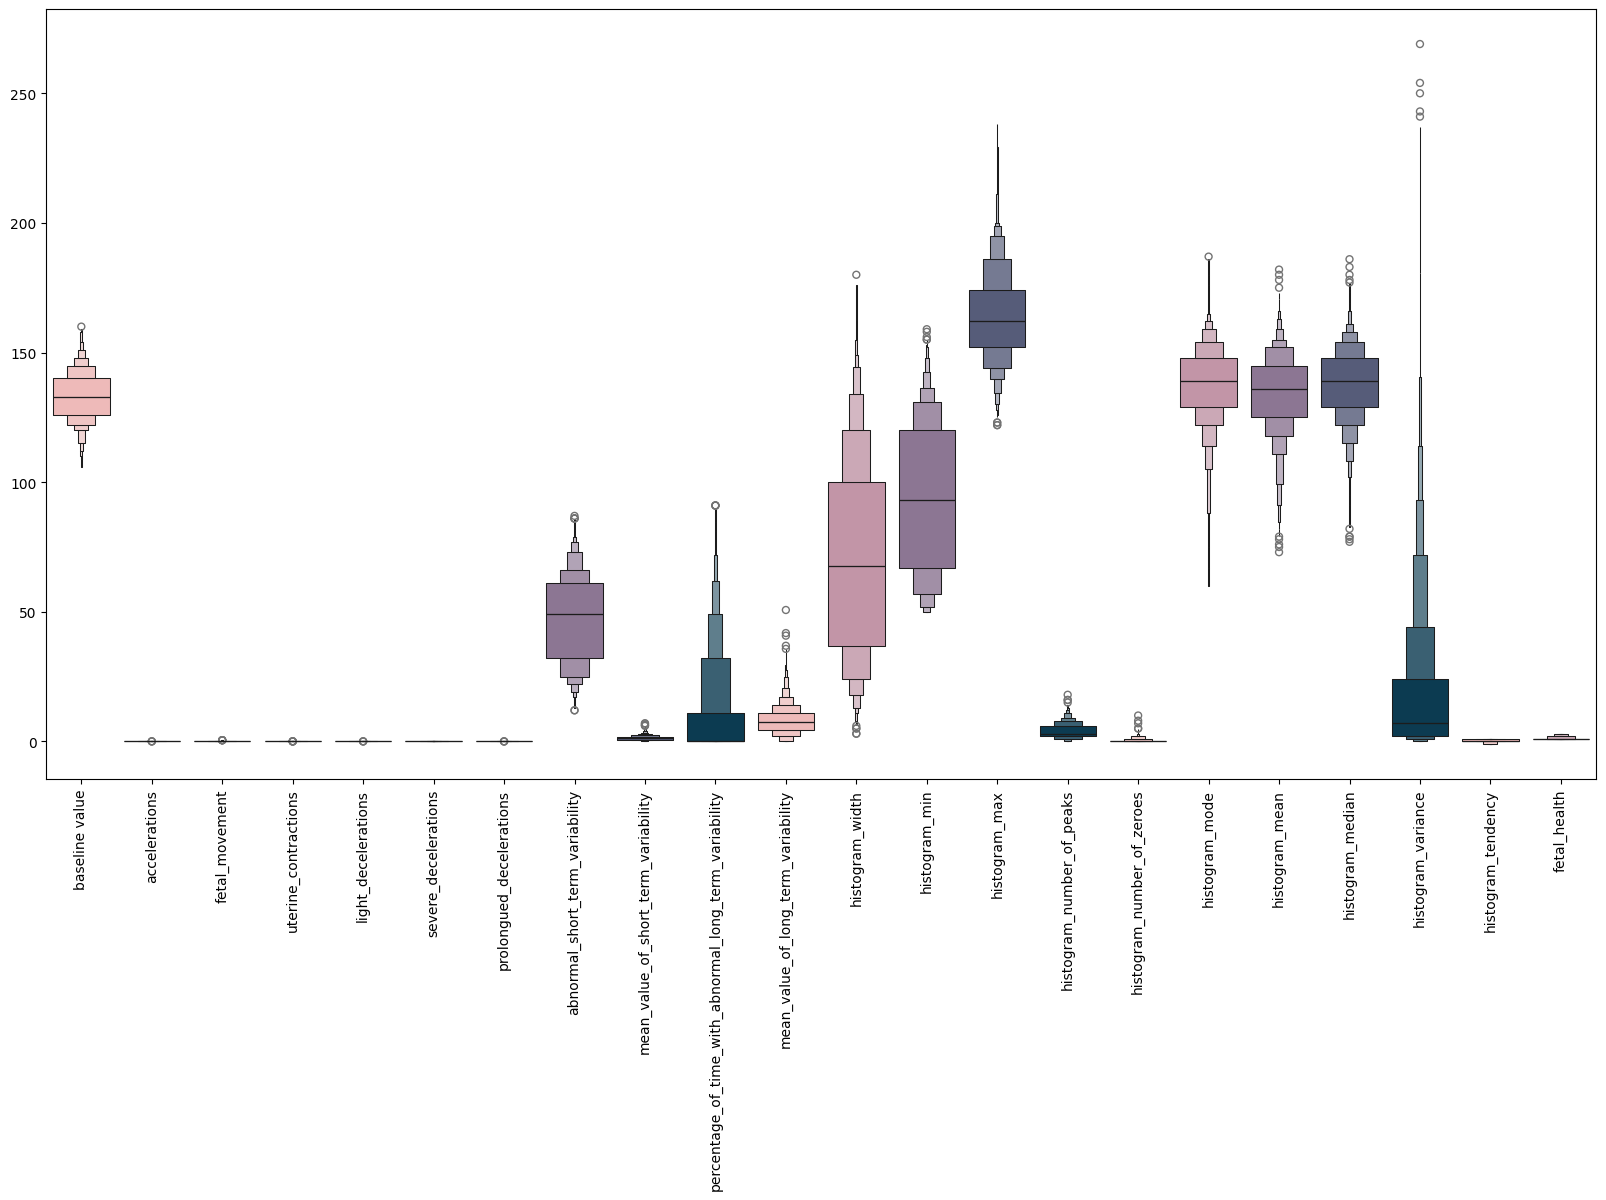

In [13]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()




MODEL SELECTION AND BUILDING


In [14]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


<ipython-input-15-f6bfc88523e5>:3: UserWarning: 
The palette list has fewer values (5) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_df,palette = shades)


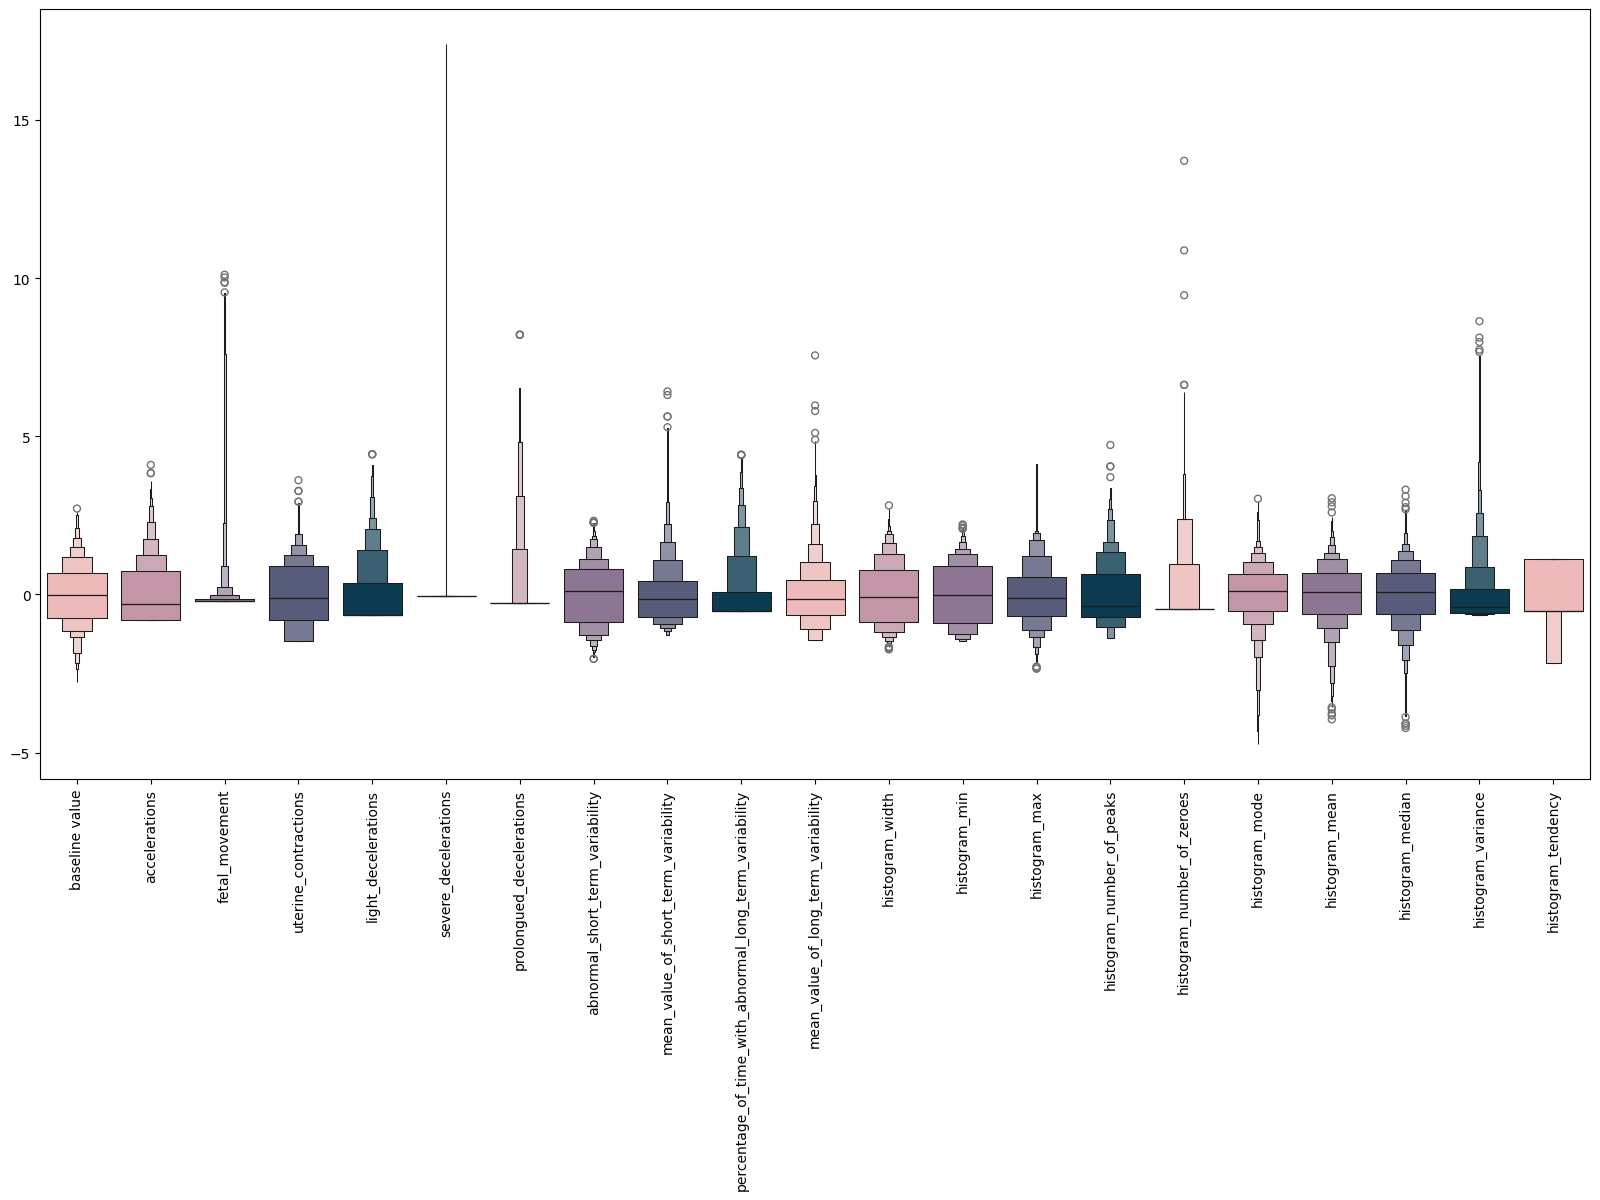

In [15]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [16]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [17]:


# Define pipelines for each model
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('svc_classifier', SVC())])
pipeline_adaboost = Pipeline([('adaboost_classifier', AdaBoostClassifier(random_state=42))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc, pipeline_adaboost]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'SVC', 4: 'AdaBoost'}

# Fit the pipelines and print accuracy
for i, pipe in enumerate(pipelines):
    pipe.fit(X_train, y_train)
    # Training accuracy
    train_pred = pipe.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    print("Training %s Accuracy: %f" % (pipe_dict[i], train_accuracy))

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))



Training Logistic Regression Accuracy: 0.903898
Training Decision Tree Accuracy: 1.000000
Training RandomForest Accuracy: 1.000000
Training SVC Accuracy: 0.926747
Training AdaBoost Accuracy: 0.913978
Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.940205 
SVC: 0.906594 
AdaBoost: 0.899891 


In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
# Building a dictionary with a list of optional values that will be analyzed by GridSearchCV
parameters = {
    'n_estimators': [100, 150, 200, 500, 700, 900],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 12, 14, 16],
    'criterion': ['gini', 'entropy'],
    'n_jobs': [-1, 1, None],
    'class_weight': ['balanced', 'balanced_subsample', None]
}


# Define the stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fitting the training set to find parameters with the best accuracy using stratified cross-validation
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=stratified_cv)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12, 14, 16],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 500, 700, 900],
                         'n_jobs': [-1, 1, None]})

In [25]:
# Getting the outcome of grid search
best_params = CV_rfc.best_params_
print("Best Parameters:", best_params)
training_accuracy = CV_rfc.best_score_
print("Training Accuracy:", training_accuracy)


Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 200, 'n_jobs': -1}
Training Accuracy: 0.9408763247689421


In [26]:

# Initializing RandomForestClassifier with the best parameters
RF_model = RandomForestClassifier(**best_params)

# Training the model on the training set
RF_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=14, n_estimators=200,
                       n_jobs=-1)

In [27]:


# Testing the Model on test set
predictions = RF_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)
accuracy_rf = accuracy_score(y_test, predictions)
recall_rf = recall_score(y_test, predictions, average="weighted")
precision_rf = precision_score(y_test, predictions, average="weighted")
f1_rf = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", accuracy_rf)
print("Recall      : ", recall_rf)
print("Precision   : ", precision_rf)
print("F1          : ", f1_rf)


Test Accuracy: 0.9435736677115988
********* Random Forest Results *********
Accuracy    :  0.9435736677115988
Recall      :  0.9435736677115988
Precision   :  0.9427343038407182
F1          :  0.9435736677115988


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.92      0.75      0.83       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.92      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



<Axes: >

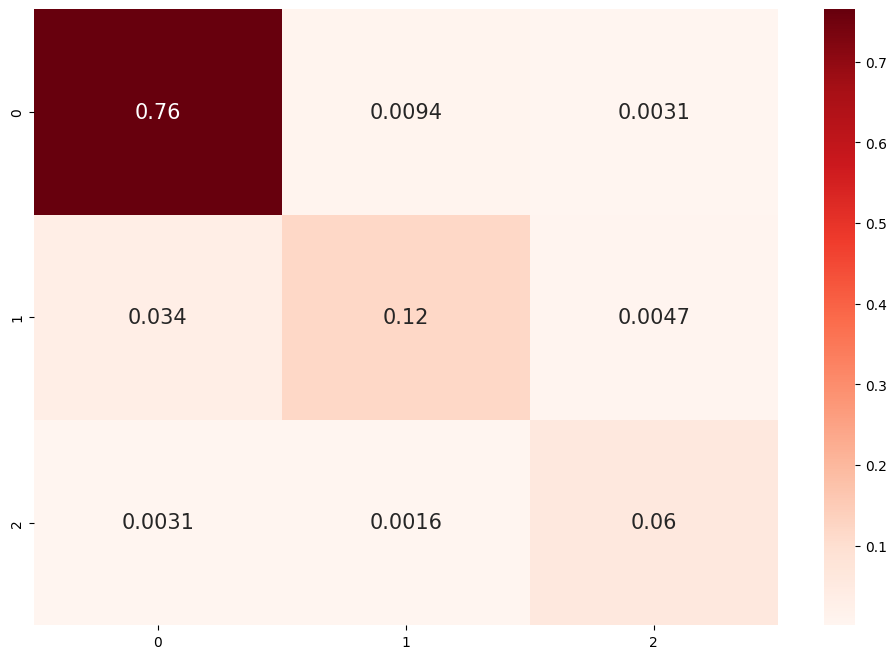

In [29]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='Reds',annot = True, annot_kws = {'size':15})

SUPPORT VECTOR MACHINE (SVM)

In [30]:
# Define parameters for SVM
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5],
}

# Fitting the training set to find parameters with the best accuracy
CV_svm = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=5)
CV_svm.fit(X_train, y_train)

# Getting the outcome of grid search
best_params = CV_svm.best_params_
print("Best Parameters:", best_params)
training_accuracy = CV_svm.best_score_
print("Training Accuracy:", training_accuracy)

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 0.9220391837841502


In [31]:
SVM_model = SVC(**CV_svm.best_params_)
SVM_model.fit(X_train, y_train)

# Testing the Model on test set
predictions_svm = SVM_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_svm)
recall_svm = recall_score(y_test, predictions_svm, average="weighted")
precision_svm = precision_score(y_test, predictions_svm, average="weighted")
f1_score_svm = f1_score(y_test, predictions_svm, average="micro")

print("********* SVM Results *********")
print("Accuracy    : ", accuracy_svm)
print("Recall      : ", recall_svm)
print("Precision   : ", precision_svm)
print("F1 Score    : ", f1_score_svm)




********* SVM Results *********
Accuracy    :  0.9247648902821317
Recall      :  0.9247648902821317
Precision   :  0.9274728642580542
F1 Score    :  0.9247648902821317


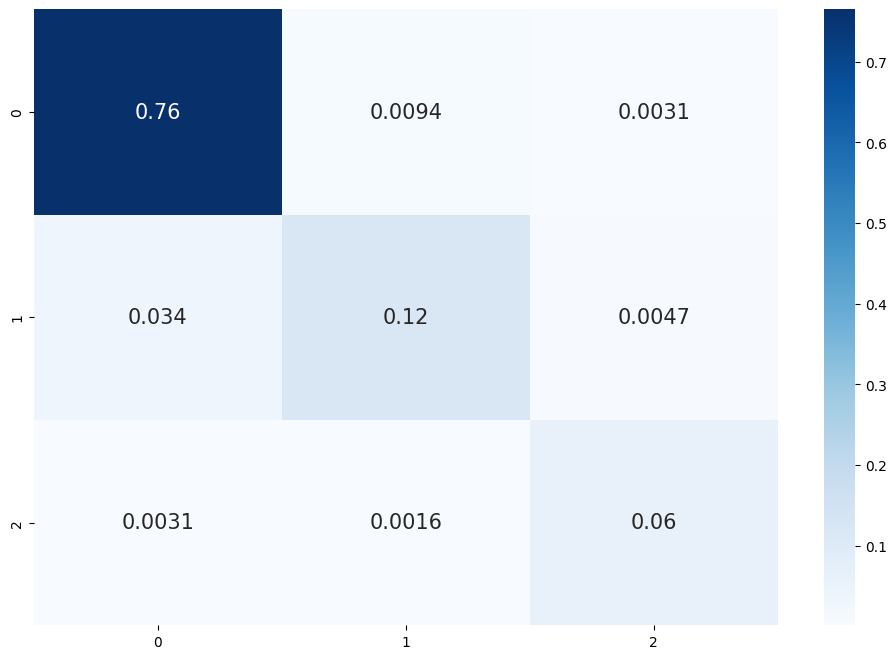

In [32]:
# Confusion matrix
plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='Blues', annot=True, annot_kws={'size': 15})
plt.show()


ADA BOOST

In [33]:
# Building a dictionary with a list of optional values that will be analyzed by GridSearch CV
parameters = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}


In [34]:
# Fitting the training set to find parameters with the best accuracy
CV_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=parameters, cv=5)
CV_ada.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 1, 2],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [35]:
# Getting the outcome of grid search
best_params = CV_ada.best_params_
print("Best Parameters:", best_params)
training_accuracy = CV_ada.best_score_
print("Training Accuracy:", training_accuracy)
AdaBoost_model = AdaBoostClassifier(**CV_ada.best_params_)
AdaBoost_model.fit(X_train, y_train)


Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 250}
Training Accuracy: 0.9173502361421825


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=250)

In [36]:
# Testing the Model on test set
predictions_adaboost = AdaBoost_model.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, predictions_adaboost)
recall_adaboost = recall_score(y_test, predictions_adaboost, average="weighted")
precision_adaboost = precision_score(y_test, predictions_adaboost, average="weighted")
f1_score_adaboost = f1_score(y_test, predictions_adaboost, average="micro")

print("********* AdaBoost Results *********")
print("Accuracy    : ", accuracy_adaboost)
print("Recall      : ", recall_adaboost)
print("Precision   : ", precision_adaboost)
print("F1 Score    : ", f1_score_adaboost)
print(classification_report(y_test, predictions_adaboost))



********* AdaBoost Results *********
Accuracy    :  0.9122257053291536
Recall      :  0.9122257053291536
Precision   :  0.9105674762205133
F1 Score    :  0.9122257053291536
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       496
         2.0       0.79      0.73      0.76       101
         3.0       0.88      0.88      0.88        41

    accuracy                           0.91       638
   macro avg       0.87      0.85      0.86       638
weighted avg       0.91      0.91      0.91       638



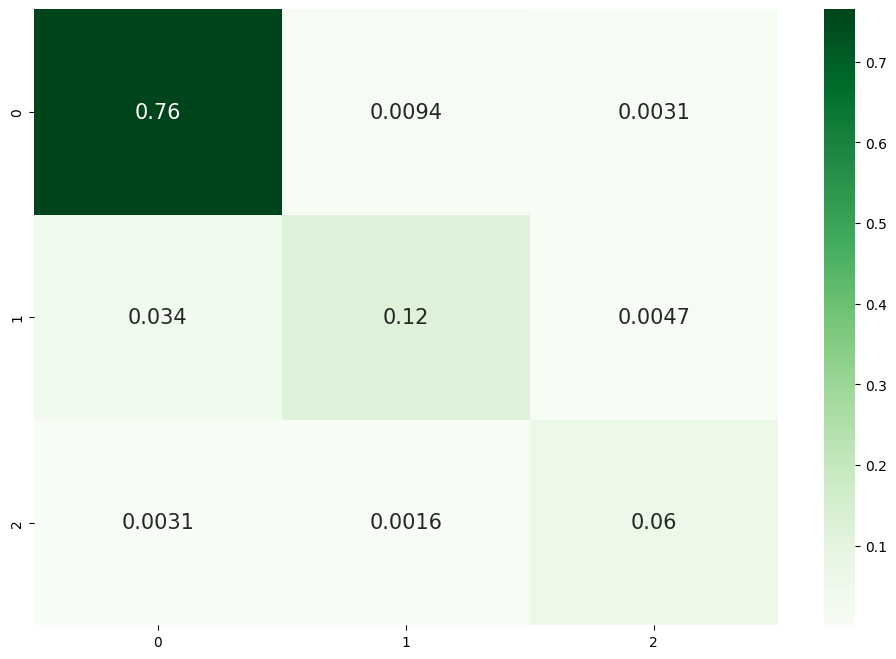

In [37]:
# Confusion matrix
plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap='Greens', annot=True, annot_kws={'size': 15})
plt.show()


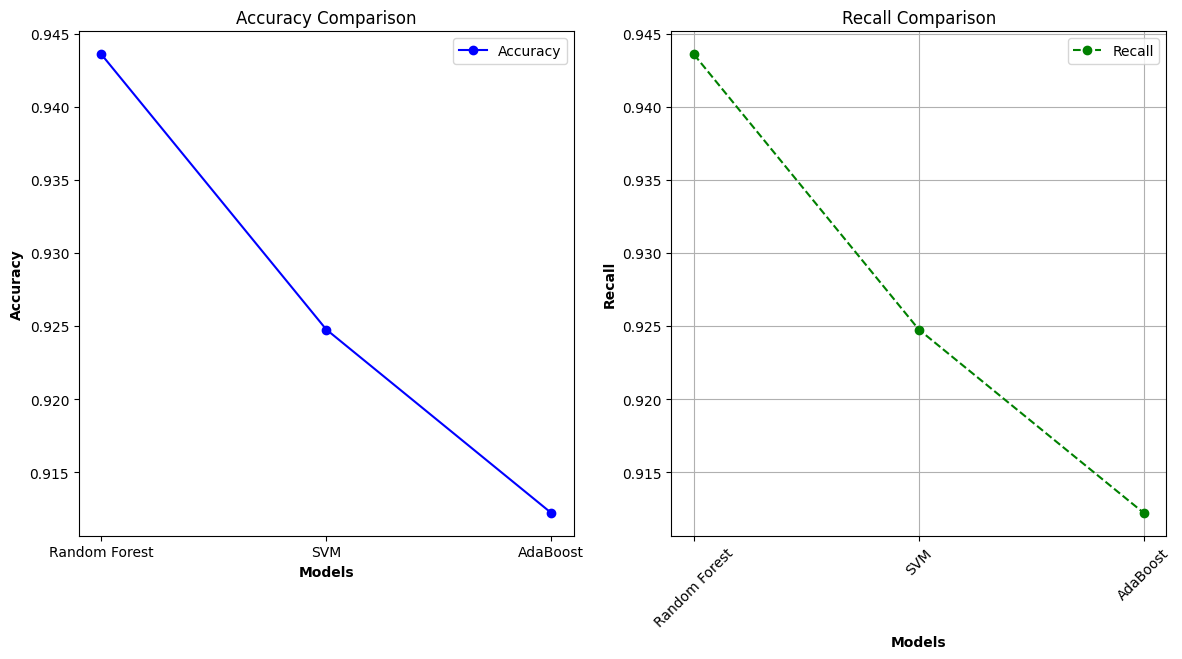

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Models
models = ['Random Forest', 'SVM', 'AdaBoost']
num_models = len(models)

# Metrics
accuracy_scores = [accuracy_rf, accuracy_svm, accuracy_adaboost]
recall_scores = [recall_rf, recall_svm, recall_adaboost]

# Plotting
plt.figure(figsize=(12, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(models, accuracy_scores, marker='o', color='blue', label='Accuracy')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison')
plt.legend()

# Recall subplot
plt.subplot(1, 2, 2)
plt.plot(models, recall_scores, marker='o', color='green', linestyle='--', label='Recall')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Recall', fontweight='bold')
plt.title('Recall Comparison')
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.show()





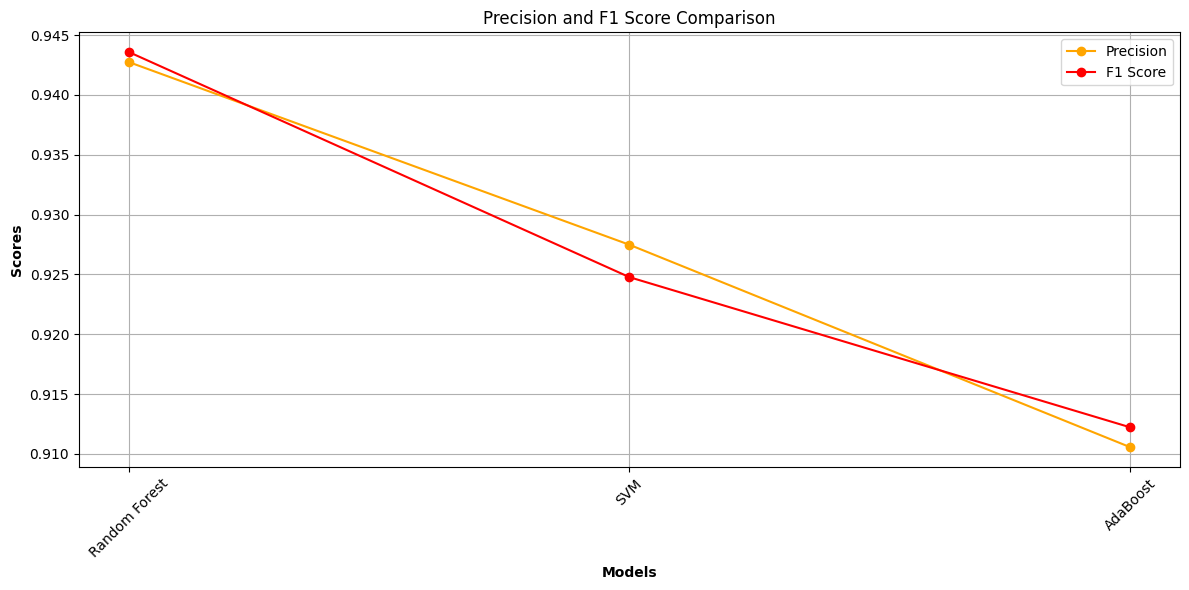

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Models
models = ['Random Forest', 'SVM', 'AdaBoost']
num_models = len(models)

# Metrics
precision_scores = [precision_rf, precision_svm, precision_adaboost]
f1_scores = [f1_rf, f1_score_svm, f1_score_adaboost]

# Plotting
plt.figure(figsize=(12, 6))

# Precision
plt.plot(models, precision_scores, marker='o', color='orange', label='Precision')

# F1 Score
plt.plot(models, f1_scores, marker='o', color='red', label='F1 Score')

# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Precision and F1 Score Comparison')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
